**Task 1:**

The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. Forty different people were photographed (10 times each), and the usual task is to train a model that Unsupervised Learning Techniques can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

This code fetches the Olivetti faces dataset, splits it into training, validation, and testing sets ensuring equal representation of each class using stratified sampling. Then, K-means clustering is used to cluster the images into 40 clusters (assuming one cluster per person as starting point). The inertia of the KMeans model is printed, which is a measure of how well the model has performed (lower inertia means better performance). Finally, the centroids of the clusters are visualized as images.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Suat\scikit_learn_data
Inertia: 6888.89990234375


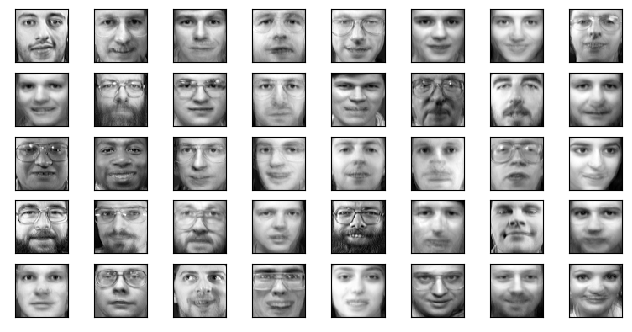

In [1]:
# Loading the necessary libraries
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset
dataset = fetch_olivetti_faces()
X = dataset.data
y = dataset.target

# Splitting the dataset into train and test sets using stratified sampling
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further splitting the temporary set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Now let's use K-Means clustering
kmeans = KMeans(n_clusters=40, random_state=42) # let's start with 40 clusters as we have 40 different people
kmeans.fit(X_train)

# Check the inertia to evaluate the model
print('Inertia:', kmeans.inertia_)

# Visualizing the clusters
fig, ax = plt.subplots(5, 8, figsize=(8, 4))
centers = kmeans.cluster_centers_.reshape(40, 64, 64)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.gray)


**Task 2:**

Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

First, let's train a classifier on the original data. In this case, we'll use a simple classifier such as the RandomForestClassifier.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a classifier on the original data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_val_pred = rfc.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

c:\Users\Suat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Suat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Suat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Next, let's use K-Means as a dimensionality reduction tool and then train a classifier on the reduced dataset:

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Use KMeans as a dimensionality reduction tool
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)), # Just a starting point
    ("rfc", RandomForestClassifier(random_state=42)),
])

# Use GridSearchCV to find the best number of clusters
param_grid = dict(kmeans__n_clusters=range(10, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)
print(grid_clf.best_score_)

# Evaluate on the validation set
y_val_pred = grid_clf.predict(X_val)
print(classification_report(y_val, y_val_pred))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END ..............................kmeans__n_clusters=10; total time=   0.6s
[CV] END ..............................kmeans__n_clusters=10; total time=   0.6s
[CV] END ..............................kmeans__n_clusters=10; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=11; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=11; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=11; total time=   0.6s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.6s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=13; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=13; total time=   0.9s
[CV] END ..............................kmeans__

c:\Users\Suat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Suat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Suat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In the second block of code, a pipeline is created that uses K-Means for dimensionality reduction, followed by a Random Forest classifier. The GridSearchCV class is then used to determine the best number of clusters by trying different values and using cross-validation.

Lastly, we can try appending the features from the reduced set to the original features:

In [4]:
# Get the cluster assignments for each instance
kmeans = KMeans(n_clusters=grid_clf.best_params_['kmeans__n_clusters'], random_state=42)
X_train_reduced = kmeans.fit_transform(X_train)

# Append the features from the reduced set to the original features
X_train_extended = np.concatenate((X_train, X_train_reduced), axis=1)

# Train the classifier on the extended dataset and evaluate
rfc_extended = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_extended.fit(X_train_extended, y_train)

X_val_reduced = kmeans.transform(X_val)
X_val_extended = np.concatenate((X_val, X_val_reduced), axis=1)

y_val_pred = rfc_extended.predict(X_val_extended)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         2
          17       0.67    

In the last block of code, the KMeans instance is fitted to the training data and then the transform method is used to get the distances from each instance to every centroid, effectively reducing the dimensionality of the dataset. The reduced features are then appended to the original features, and the Random Forest classifier is trained on this extended dataset. Finally, the classifier is evaluated on the validation set.